<a href="https://colab.research.google.com/github/rebran12/TugasPhython/blob/main/Tugas_11_KlasifikasiDaun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [54]:
ls

dataset/  Untitled0.ipynb


In [56]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [57]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [58]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [59]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [60]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [61]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.10, shuffle=True)
print(trainX.shape)
print(testX.shape)

(526, 240, 240, 3)
(59, 240, 240, 3)


In [62]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 64)       

In [63]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 17s 1s/step - loss: 1.6060 - accuracy: 0.2015 - val_loss: 1.5831 - val_accuracy: 0.1695
Epoch 2/25
17/17 [==============================] - 17s 1s/step - loss: 1.4874 - accuracy: 0.3346 - val_loss: 1.3619 - val_accuracy: 0.3390
Epoch 3/25
17/17 [==============================] - 17s 1s/step - loss: 1.2596 - accuracy: 0.4544 - val_loss: 1.2415 - val_accuracy: 0.4407
Epoch 4/25
17/17 [==============================] - 17s 1s/step - loss: 1.0331 - accuracy: 0.5494 - val_loss: 0.9820 - val_accuracy: 0.5763
Epoch 5/25
17/17 [==============================] - 17s 1s/step - loss: 0.9390 - accuracy: 0.6464 - val_loss: 1.1062 - val_accuracy: 0.6441
Epoch 6/25
17/17 [==============================] - 17s 1s/step - loss: 0.9056 - accuracy: 0.6426 - val_loss: 0.8759 - val_accuracy: 0.6102
Epoch 7/25
17/17 [==============================] - 17s 1s/step - loss: 0.8125 - accuracy: 0.7034 - val_loss: 0.8510 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


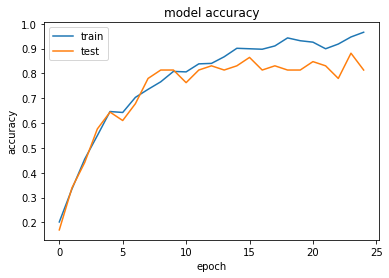

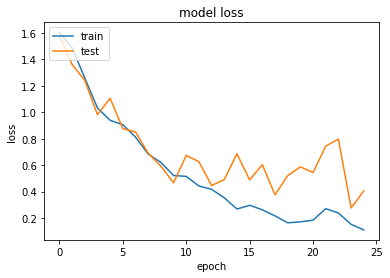

In [64]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.65      1.00      0.79        11
      GMB_03       0.85      0.92      0.88        12
      GMB_05       0.89      0.80      0.84        10
      GMB_07       0.88      0.58      0.70        12
      GMB_09       0.92      0.79      0.85        14

    accuracy                           0.81        59
   macro avg       0.83      0.82      0.81        59
weighted avg       0.84      0.81      0.81        59



In [66]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets
